In [1]:
#예제 4-6 matplotlib 스타일리스트 출력

# -*- coding: utf-8 -*-

#라이브러리 불러오기
import matplotlib.pyplot as plt

#스타일 리스트 출력
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
#예제 4-7
# -*- coding: utf-8 -*-

#라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

#matplotlib 한글 폰트 오류문제 해결
from matplotlib import font_manager, rc
font_path = "./malgun.ttf" #폰트파일 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [4]:
#Excel 데이터를 데이터 프레임으로 변환
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

#전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

In [5]:
#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] !='서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

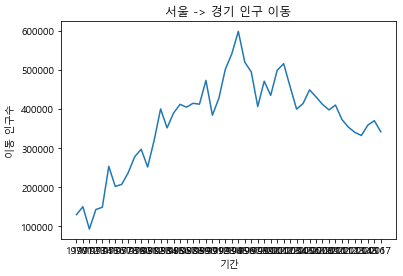

In [7]:
#서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

#x, y 축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

#차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

#축 이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

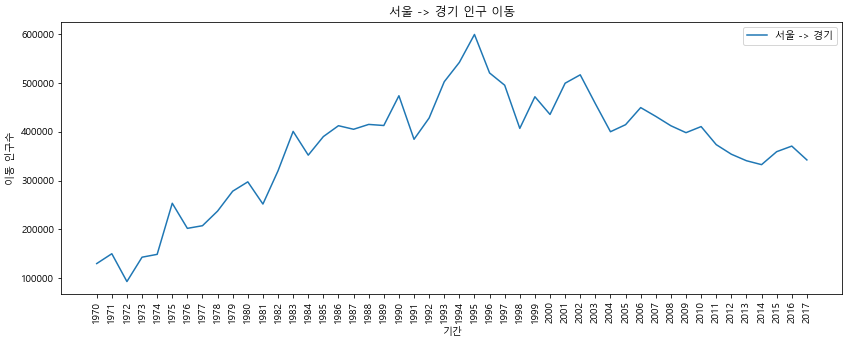

In [8]:
#그림 사이즈 지정(가로 14인치, 세로 5인치)
plt.figure(figsize=(14,5))

#x축 눈금 라벨 회전하기
plt.xticks(rotation='vertical')

#x,y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동') #차트제목
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.legend(labels=['서울 -> 경기'], loc='best') #범례표시

plt.show()

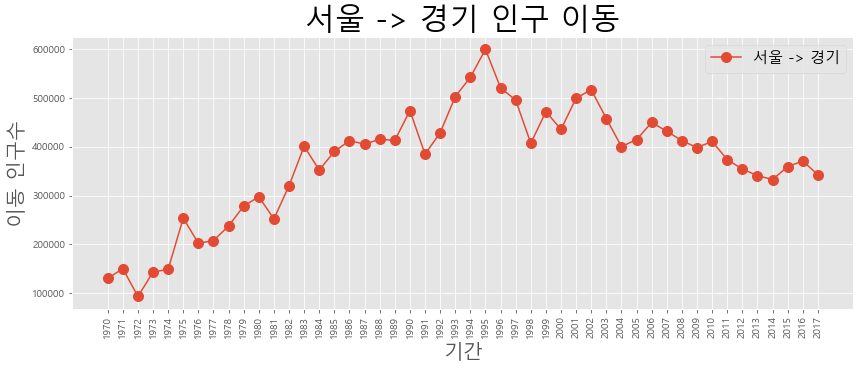

In [9]:
#스타일 서식 지정
plt.style.use('ggplot')

#그림 사이즈 지정
plt.figure(figsize=(14,5))

#x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) #마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) #차트 제목
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best',fontsize = 15)

plt.show()

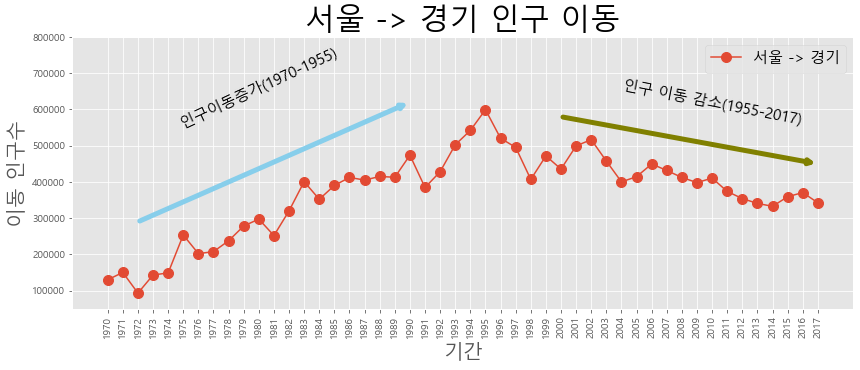

In [12]:
#스타일 서식 지정
plt.style.use('ggplot')

#그림 사이즈 지정
plt.figure(figsize=(14,5))

#x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

#x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) #마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30) #차트 제목
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best',fontsize = 15)


#y축 범위 지정(최소값 최대값)
plt.ylim(50000, 800000)

#주석 표시 - 화살표
plt.annotate(
    '',
    xy=(20, 620000), #화살표의 머리 부분(끝점)
    xytext=(2,290000), #화살표의 꼬리부분(시작점)
    xycoords='data', #좌표체계
    arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), #화살표 서식
    

)
plt.annotate(
    '',
    xy=(47,450000),
    xytext=(30,580000),
    xycoords='data',
    arrowprops=dict(arrowstyle='->', color='olive', lw=5)
)

#주석표시 - 텍스트
plt.annotate('인구이동증가(1970-1955)', #텍스트 입력
             xy=(10,550000), #텍스트 위치 기준점
             rotation=25, #텍스트 회전 각도
             va='baseline', # 텍스트 상하정렬
             ha='center', #텍스트 좌우 정렬
             fontsize=15,
            )
plt.annotate('인구 이동 감소(1955-2017)',
             xy=(40,560000),
             rotation=-11,
             va='baseline',
             ha='center',
             fontsize=15
            )

plt.show()